# First import all the necessary Library 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Now load the file here 

In [5]:
df = pd.read_csv(r"Telecom_customer_churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# check the data 

In [6]:
df.info

<bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL 

### Then see the column total charges is show data type as object so we need to covert into float and in total charges column there an blank so i replace with zero

In [7]:
df['TotalCharges'] = df['TotalCharges'].replace(" ","0")
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


# check duplicates

In [11]:
df.duplicated().sum()

np.int64(0)

# check customer id column its id duplicate or not 

In [12]:
df['customerID'].duplicated().sum()

np.int64(0)

# conver the Senior citizen column values

In [13]:
def conv(value):
    if value == 1:
        return 'yes'
    else:
        return "no"
df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)

# Inscpection is done 

# use countplot of customer churn 

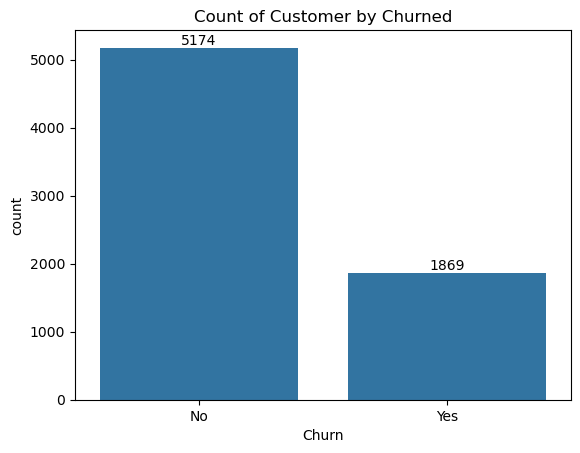

In [14]:
ax = sns.countplot(x= 'Churn',data = df)

ax.bar_label(ax.containers[0])
plt.title("Count of Customer by Churned")
plt.show()

# Use pie chart to show in percentage 

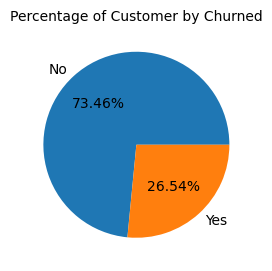

In [15]:
plt.figure(figsize=(3,4))
gd = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gd['Churn'], labels = gd.index, autopct = "%.2f%%")
plt.title("Percentage of Customer by Churned",fontsize = 10)
plt.show()

### From pie chart we can conclude 26.54% customer churned out and 73.46% are not

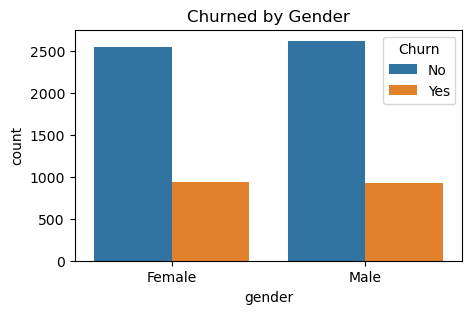

In [16]:
plt.figure(figsize=(5,3))
sns.countplot(x = 'gender',data = df , hue = 'Churn')
plt.title("Churned by Gender")
plt.show()

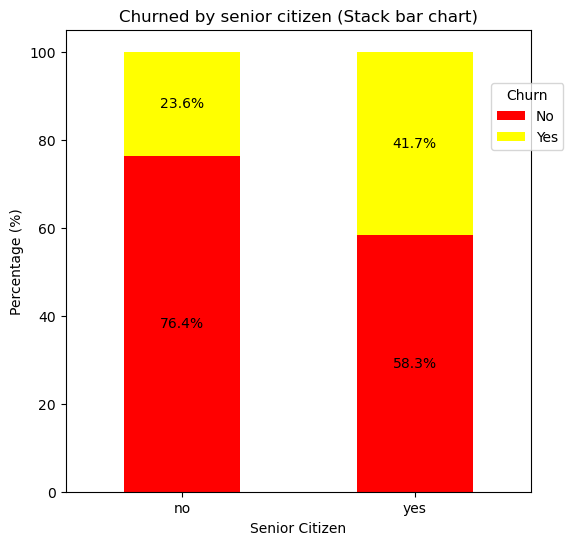

In [17]:
total_counts = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize = True).unstack() * 100

fig, ax = plt.subplots(figsize=(6,6))

total_counts.plot(kind='bar',stacked=True,ax=ax, color=['red','yellow'])

for p in ax.patches:
    width, height = p.get_width(),p.get_height()
    x,y = p.get_xy()
    ax.text(x + width/2, y + height / 2, f'{height:.1f}%', ha = 'center', va = 'center')

plt.title("Churned by senior citizen (Stack bar chart)")
plt.xlabel('Senior Citizen')
plt.ylabel('Percentage (%)')
plt.xticks(rotation = 0)
plt.legend(title = 'Churn', bbox_to_anchor=(0.9,0.9))
plt.show()



Axes(0.125,0.11;0.775x0.77)


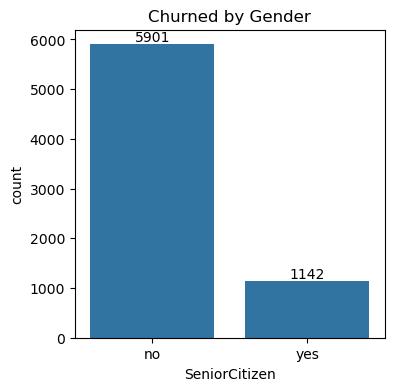

In [18]:
plt.figure(figsize=(4,4))
ab = sns.countplot(x = 'SeniorCitizen',data = df )
print(ab)
ab.bar_label(ab.containers[0])
plt.title("Churned by Gender")
plt.show()

In [19]:
# comparative a greated percentage of people in senior citizen category 

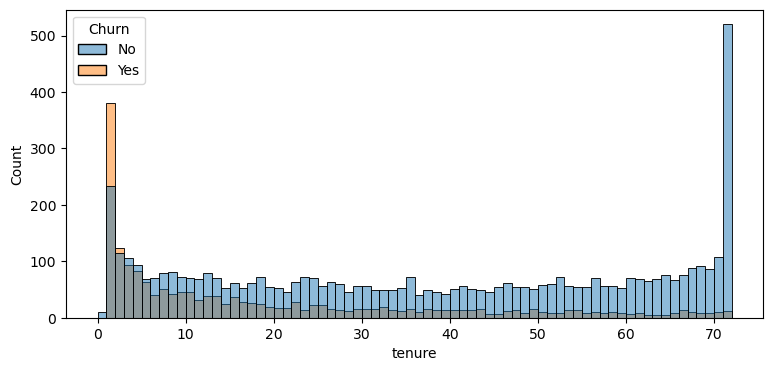

In [20]:
plt.figure(figsize = (9,4))
sns.histplot(x = 'tenure', data = df , bins = 72 , hue = 'Churn')
plt.show()

Axes(0.125,0.11;0.775x0.77)


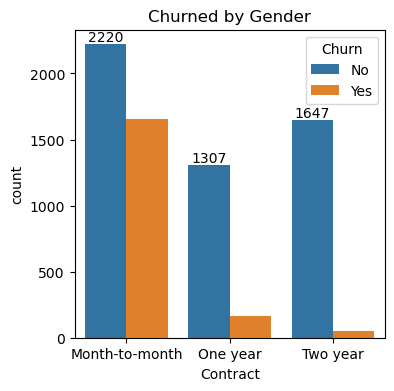

In [21]:
plt.figure(figsize=(4,4))
ab = sns.countplot(x = 'Contract',data = df , hue = 'Churn' )
print(ab)
ab.bar_label(ab.containers[0])
plt.title("Churned by Gender")
plt.show()

In [22]:
## here we know when people who are month to month contract those are likely to churn 

In [23]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

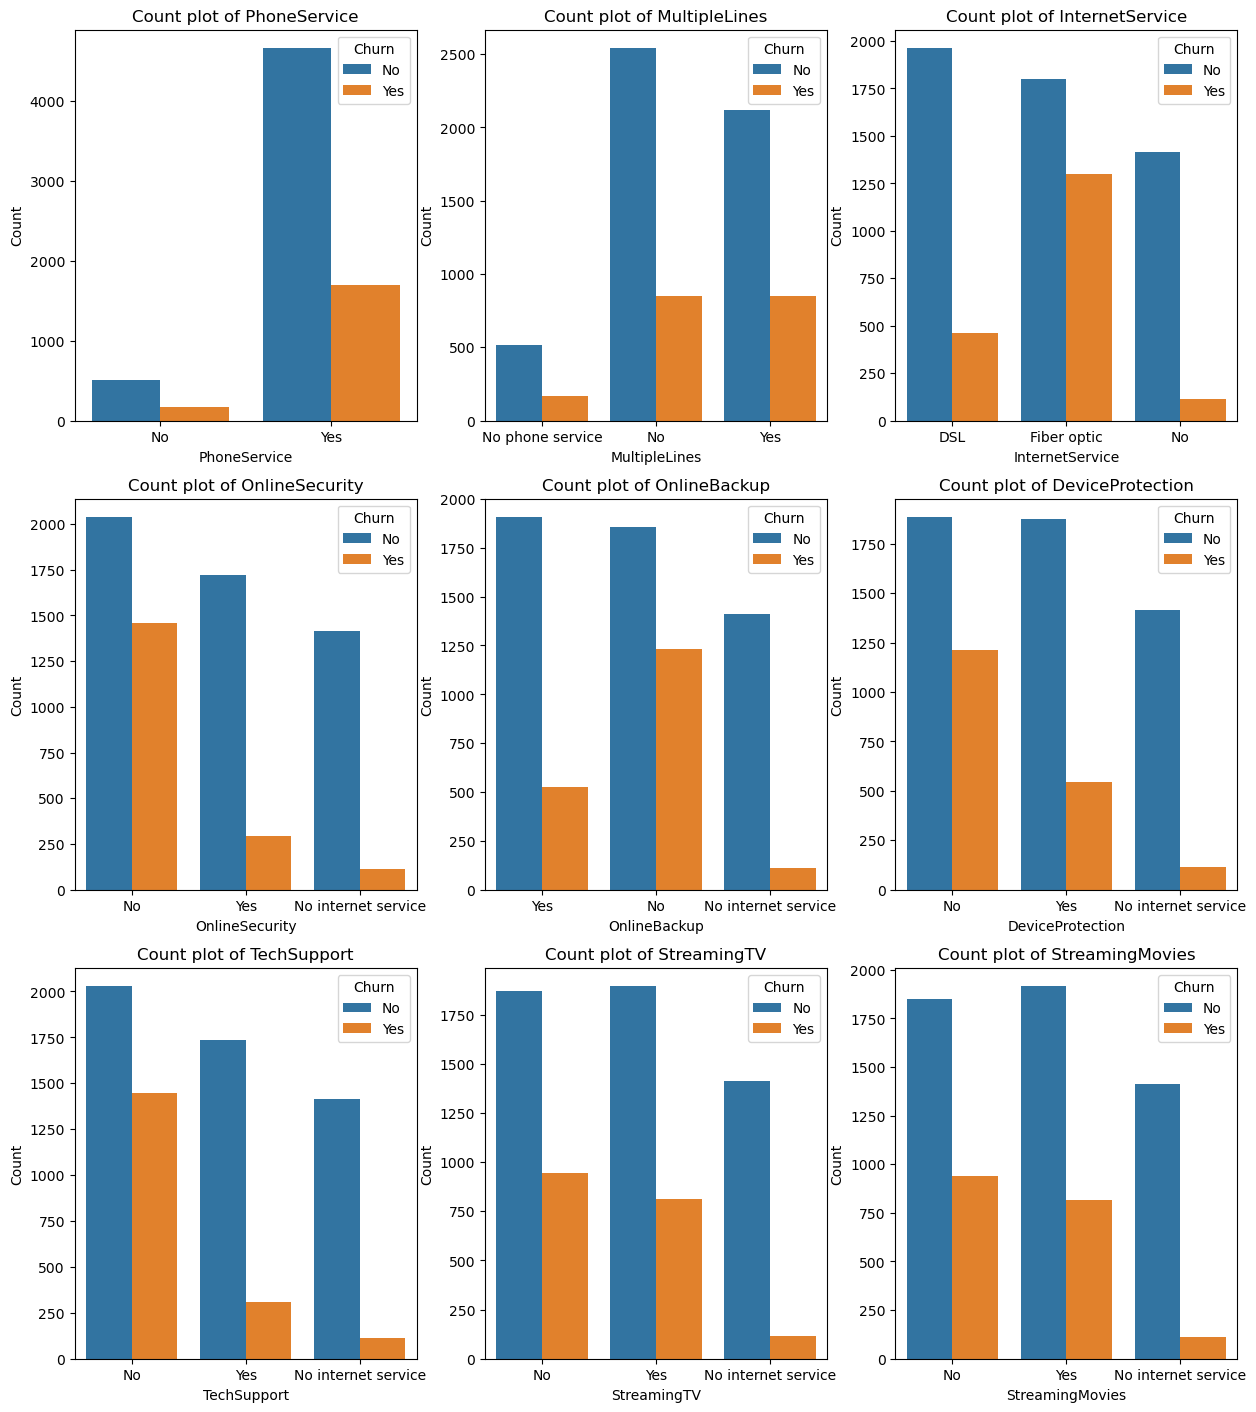

In [24]:
columns = ['PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies']

n_col = 3
n_rows = (len(columns) + n_col - 1) # calculate number of row needed
fig , axes = plt.subplots(n_rows,n_col, figsize=(15,n_rows*6))

axes = axes.flatten()

for i, col in enumerate(columns):
    sns.countplot(x = col, data = df, ax = axes[i], hue = df['Churn'])
    axes[i].set_title(f'Count plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

for j in range (i+1,len(axes)):
    fig.delaxes(axes[j])

Axes(0.125,0.11;0.775x0.77)


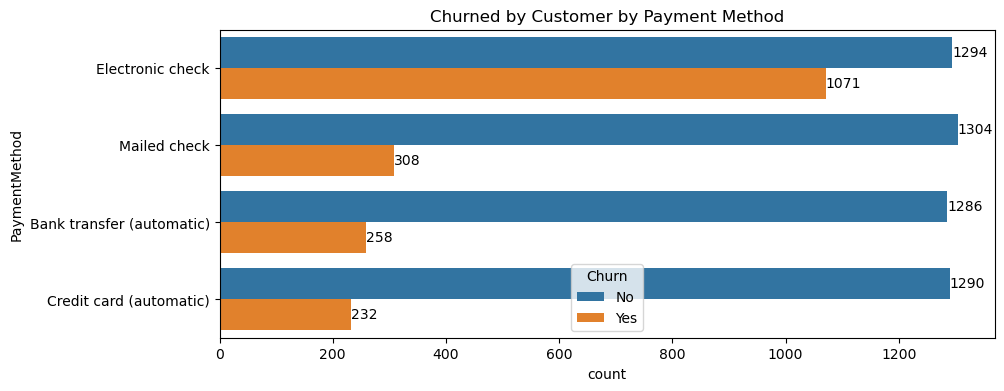

In [25]:
plt.figure(figsize=(10,4))
ab = sns.countplot(y='PaymentMethod', data=df, hue='Churn')  # use y= for horizontal
print(ab)

# Add labels on bars
for container in ab.containers:
    ab.bar_label(container)

plt.title("Churned by Customer by Payment Method")
plt.show()